In [12]:
#注 需要获取邮箱授权码后使用
from sklearn import metrics
import warnings
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import naive_bayes
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
warnings.filterwarnings('ignore')
df = pd.read_csv('mushrooms.csv')
df = pd.get_dummies(df) # one hot encoder
df.head()
import os
import time
import urllib.request
import re
import urllib
import sys
from urllib.error import HTTPError
import bs4
import pandas as pd
import smtplib
import email
from email.mime.text import MIMEText
from email.mime.image import MIMEImage
from email.mime.multipart import MIMEMultipart
from email.header import Header
from sqlalchemy import create_engine
import sqlite3
from sqlalchemy import MetaData, Table, Column, String, Integer, Float, Boolean
import threading
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder


In [13]:
data=pd.DataFrame()
for i in range(1,23):
    a=pd.get_dummies(df.iloc[:,i])
    data=df.join(a)
y = data['class_p']
#y = pd.DataFrame(data, columns = ['class_p'])
x = data
x = df.drop(columns=['class_e','class_p'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=11)
#数据集已经分割完成,y为编码后的'class_p','class_e'实际上舍去
encoder = LabelEncoder()
#label encode
#other_format = encoder.fit_transform(df)
df.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
# Logistic Regression
modelLR1 = linear_model.LogisticRegression()
modelLR1.fit(x_train,y_train)
#print(modelLR1.score(x_test,y_test))
# Decision Tree
modelTR1 = tree.DecisionTreeClassifier().fit(x_train,y_train)
#print(modelTR1.score(x_test,y_test))
# K Nearest Neighbor
modelKNN1 = neighbors.KNeighborsClassifier().fit(x_train,y_train)
#print(modelKNN1.score(x_test,y_test))
# Support Vector Machine
modelSVM1 = svm.SVC()
modelSVM1.fit(x_train,y_train)
#print(modelSVM1.score(x_test,y_test))
result = modelLR1.predict(x_test)
#print(len(result))

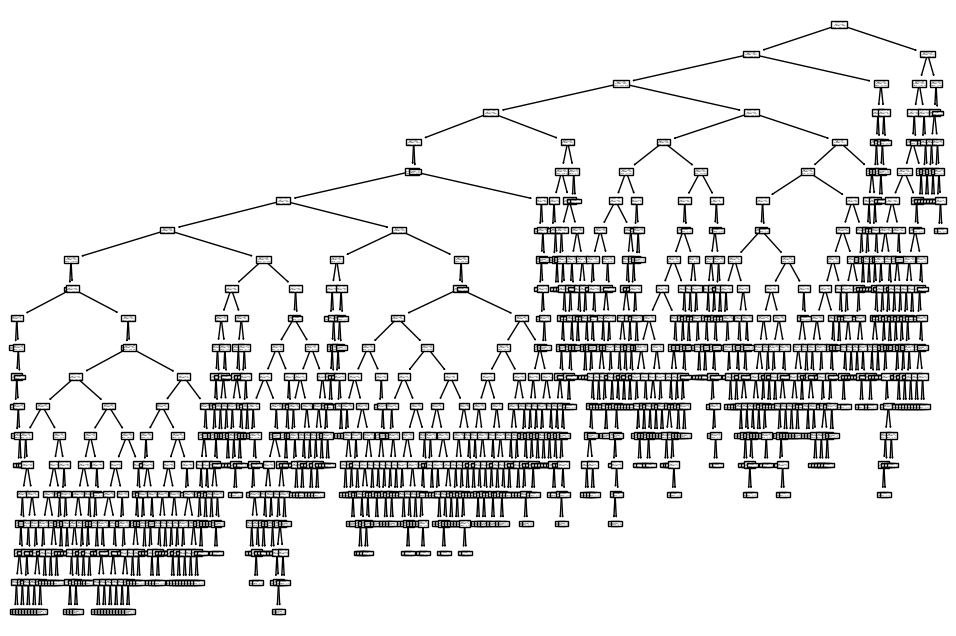

In [15]:
from sklearn import svm
from sklearn import tree
clf =tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
#clf.fit(x, y)
#调好了 别再乱动
x_train.head()
#x_train.head()
#svm出现问题 尝试tree
asd=x_train.iloc[[0]]
asd=asd.values
#print(asd)
result1 = clf.predict(x_test)
result = result1
y0 = y_test
plt.figure(figsize=(12,8))
tree.plot_tree(clf.fit(x_train, y_train))
plt.savefig('./test2.jpg')


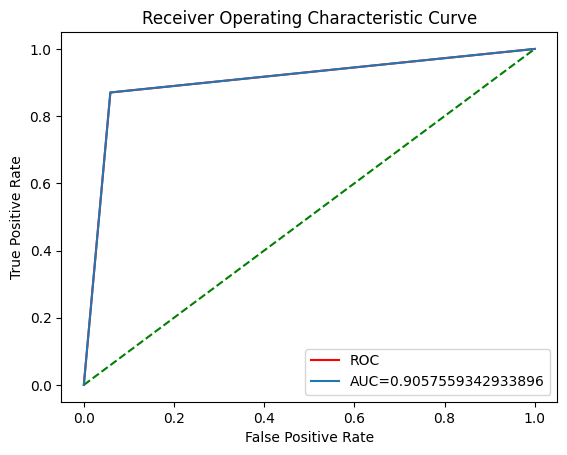

In [16]:
fper, tper, thresholds = roc_curve(y_test,result1)
plt.plot(fper, tper, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
auc = metrics.roc_auc_score(y_test, result1)
plt.plot(fper,tper,label="AUC="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

In [19]:
def send_mail(text,Subject = '!!!!!!!',mail_host = "smtp.qq.com",mail_sender = "486305123@qq.com",mail_license ="",mail_receivers = "dahaoren12138@hotmail.com"):
    #Subject蘑菇毒性
    #try:
        mail = MIMEMultipart(text)
        mail['Subject'] = Subject
        mail['From'] = mail_sender
        mail['To'] = mail_receivers
        #image_data = open('a.jpg','rb')
        #message_image = MIMEImage(image_data.read())
        #image_data.close()
        #mail.attach(message_image)
        smtp = smtplib.SMTP_SSL(mail_host)
        smtp.login(mail_sender,mail_license)
        smtp.sendmail(mail_sender,mail_receivers,mail.as_string())
        smtp.quit()
def receive_email(email = '486305123@qq.com',password ="",pop3_server = 'pop.qq.com'):
    server = poplib.POP3_SSL(pop3_server)
    server.set_debuglevel(1)
    server.user(email)
    server.pass_(password)
    resp, mails, octets = server.list()
    index = len(mails)
    resp, lines, octets = server.retr(index)
    server.quit()
    return lines
def send_mail(text,Subject = '!!!!!!!',mail_host = "smtp.qq.com",mail_sender = "486305123@qq.com",mail_license="",mail_receivers = "dahaoren12138@hotmail.com"):
    #Subject蘑菇毒性
    #try:
        mail = MIMEMultipart(text)
        mail['Subject'] = Subject
        mail['From'] = mail_sender
        mail['To'] = mail_receivers
        #image_data = open('a.jpg','rb')
        #message_image = MIMEImage(image_data.read())
        #image_data.close()
        #mail.attach(message_image)
        smtp = smtplib.SMTP_SSL(mail_host)
        smtp.login(mail_sender,mail_license)
        smtp.sendmail(mail_sender,mail_receivers,mail.as_string())
        smtp.quit()        

In [23]:
#邮件识别码
#蘑菇数据格式[[0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1
#  0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0
# 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
#  0 1 1 0 0 0 0 0 0]]
def email_analysis(asd):#正常
    str_asd = str(asd)
    inter = re.findall('[10]',str_asd)
    type(inter)
    L=[]
    for i in inter:
        L.append(int(i))
    #print(L)
    L1=[]
    L1.append(L)
    L=np.array(L1)
    a=clf.predict(L)
    return a[0]

def receive_process(lines,email_identifier="email_identifier",feature_format=""):
    while True:
        if re.search(email_identifier,lines):
            return email_analysis(lines)
        else:
            time.sleep(5)

def receive_email(email = '486305123@qq.com',password = 'eprqlgvnbldycafh',pop3_server = 'pop.qq.com'):#正常
    server = poplib.POP3_SSL(pop3_server)
    server.set_debuglevel(1)
    server.user(email)
    server.pass_(password)
    resp, mails, octets = server.list()
    index = len(mails)
    resp, lines, octets = server.retr(index)
    server.quit()
    return lines

def send_mail(text="!!!",Subject = '!!!!!!!!!!!!!!!!',mail_host = "smtp.qq.com",mail_sender = "486305123@qq.com",mail_license = "eprqlgvnbldycafh",mail_receivers = "dahaoren12138@hotmail.com"):
    #Subject蘑菇毒性
    #正常
    #try:
        mail = MIMEMultipart(text)
        mail['Subject'] = Subject
        mail['From'] = mail_sender
        mail['To'] = mail_receivers
        #image_data = open('a.jpg','rb')
        #message_image = MIMEImage(image_data.read())
        #image_data.close()
        #mail.attach(message_image)
        smtp = smtplib.SMTP_SSL(mail_host)
        smtp.login(mail_sender,mail_license)
        smtp.sendmail(mail_sender,mail_receivers,mail.as_string())
        smtp.quit()
            
a=email_analysis(asd)
if a == 0:
    text = "mushroom is poisonous"
else:
    text = "mushroom is unpoisonous"
send_mail(Subject = text)
print(a)
print("解析完成")
print("邮件文本")
print(lines)

0
解析完成
[b'Received: from APC01-TYZ-obe.outbound.protection.outlook.com (mail-tyzapc01on2061f.outbound.protection.outlook.com [2a01:111:f403:704b::61f])', b'\tby newxmmxsza6-11.qq.com (NewMX) with SMTP id 6852BA57', b'\tfor <486305123@qq.com>; Sat, 04 Feb 2023 21:26:05 +0800', b'X-QQ-mid: xmmxza6-11t1675517165te5n3dw2h', b'X-QQ-XMAILINFO: MdoFsOCkV0XGc8R1Y2YmzpiZsTrSvS3IQdKrLfeM79orS+pI5VwWTeEE+2xW6t', b'\t wfFDjnEGFNkXBHXgRV+oQHDxLbVByu9gRxDY/5ecyk/h3t1v+jdnHoo3OT2/2SC3+bYGtqUSlvnR', b'\t OQYSq+cORThs26NyK9c+Aq3FfNapidC4Bu2jChLND5xWp/N29EnUkVDd3TT2ORKHV5jFX32pCUcV', b'\t J0pjW2Z7CnqhpUdSWJqKzHnhzEjBLWwhScm8/qnvkWyhx2VW4keoAlRI3W7Q5ckd/Iwv/0jo8+8D', b'\t HTW7TK3dv7gAT2tQp4rFo1YT8pl4emnHlahx+IKyHaewXGHxeTu/zKY84Kgdbi+UL6owKe03EvFd', b'\t qFNzhAvwgEKwf4I2ZNhPKLoJTfag+DJI0xcAfhyYsgZlepf/acGI69T9PEHBsvFDD/Z09gjzqSZV', b'\t k9j3sRZ07ZvvblMCdTDxxPv0lm0JpkoaL8ZA3TjemMDTJqr3mGth+EOatFTvipj303P1QzJhNC35', b'\t VBknjWSYOgDgOpKwmO0PAVh4P+i4QjLkmar1OOd+rOxoJuft4rQejTv0mq9AeSeoGNwSvi22ly5P', b'\t o3

In [ ]:
#asd正常数据格式
def email_analysis_vote(asd):#正常
    str_asd = str(asd)
    inter = re.findall('[10]',str_asd)
    type(inter)
    L=[]
    for i in inter:
        L.append(int(i))
    L1=[]
    L1.append(L)
    L=np.array(L1)
    a=clf.predict(L)
    b=modelLR1.predict(L)
    c=neighbors.predict(L)
    if a[0] == 1:
        return 1
    else:
        if b[0] == 1:
            return 1
        else:
            if c[0] == 1:
                return 1
            else:
                return 0

def receive_process(lines,email_identifier="email_identifier",feature_format=""):
    while True:
        if re.search(email_identifier,lines):
            return email_analysis(lines)
        else:
            time.sleep(5)

def receive_email(email = '486305123@qq.com',password =,pop3_server = 'pop.qq.com'):#正常
    server = poplib.POP3_SSL(pop3_server)
    server.set_debuglevel(1)
    server.user(email)
    server.pass_(password)
    resp, mails, octets = server.list()
    index = len(mails)
    resp, lines, octets = server.retr(index)
    server.quit()
    return lines

def send_mail(text="!!!",Subject = '!!!!!!!!!!!!!!!!',mail_host = "smtp.qq.com",mail_sender = "486305123@qq.com",mail_license = ,mail_receivers = "dahaoren12138@hotmail.com"):
    #Subject蘑菇毒性
    #正常
    #try:
        mail = MIMEMultipart(text)
        mail['Subject'] = Subject
        mail['From'] = mail_sender
        mail['To'] = mail_receivers
        #image_data = open('a.jpg','rb')
        #message_image = MIMEImage(image_data.read())
        #image_data.close()
        #mail.attach(message_image)
        smtp = smtplib.SMTP_SSL(mail_host)
        smtp.login(mail_sender,mail_license)
        smtp.sendmail(mail_sender,mail_receivers,mail.as_string())
        smtp.quit()

#receive_process(lines,email_identifier="email_identifier",feature_format="")
#a=email_analysis(asd)
def all_in_one():
    while True:
        print("邮件检索中")
        try:
            asd=receive_email(email = '486305123@qq.com',password =,pop3_server = 'pop.qq.com')
            receive_process(lines,email_identifier="email_identifier",feature_format="")
            if a == 0:
                text = "mushroom is poisonous"
            else:
                text = "mushroom is non-toxic"
            send_mail(Subject = text,text="!!!!!!!!!!!!!")
        except:
            all_in_one()
            
all_in_one()

    
